## Задача: Розробити модель регресії, яка може передбачати ринкову вартість будинку на основі його характеристик та місцеположення.

1. MedInc: Середній дохід у районі (можливо, у тисячах доларів чи іншій валюті).
2. HouseAge: Середній вік будинків у районі (роки).
3. AveRooms: Середня кількість кімнат на будинок у районі.
4. AveBedrms: Середня кількість спалень на будинок у районі.
5. Population: Загальна кількість населення у районі.
6. AveOccup: Середня кількість осіб, які проживають в одному будинку.
7. Latitude: Широта району.
8. Longitude: Довгота району.

Цільовою змінною є середня вартість будинку для районів Каліфорнії.

In [45]:
from sklearn.datasets import fetch_california_housing

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

from sklearn.pipeline import Pipeline

In [88]:
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target, columns=["Target"])

In [89]:
full_df = X
full_df['Target'] = y.values

In [90]:
full_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Figure size 1000x800 with 0 Axes>

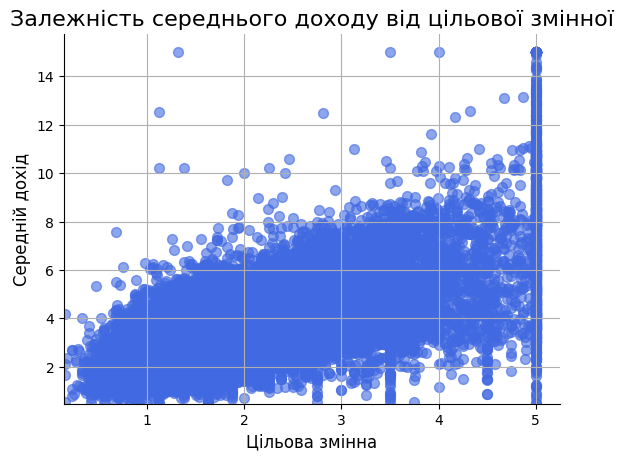

In [100]:
from matplotlib import pyplot as plt

# Встановлюємо розмір графіку
plt.figure(figsize=(10, 8))

# Створюємо діаграму розсіювання
scatter_plot = full_df.plot(kind='scatter', x='Target', y='MedInc', s=50, alpha=0.6, color='royalblue')

# Встановлюємо назви осей
scatter_plot.set_xlabel('Цільова змінна', fontsize=12)
scatter_plot.set_ylabel('Середній дохід', fontsize=12)

# Встановлюємо назву для графіку
scatter_plot.set_title('Залежність середнього доходу від цільової змінної', fontsize=16)

# Включаємо сітку
scatter_plot.grid(True)

# Встановлюємо межі для осей, якщо потрібно
scatter_plot.set_xlim(left=full_df['Target'].min() * 0.95, right=full_df['Target'].max() * 1.05)
scatter_plot.set_ylim(bottom=full_df['MedInc'].min() * 0.95, top=full_df['MedInc'].max() * 1.05)

# Прибираємо небажані осьові лінії
scatter_plot.spines[['top', 'right']].set_visible(False)

# Показуємо графік
plt.show()


In [98]:
full_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [9]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [12]:
X.shape

(20640, 8)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
y_train

,Target
14196,1.030
8267,3.821
17445,1.726
14265,0.934
2271,0.965
...,...
11284,2.292
11964,0.978
5390,2.221
860,2.835


In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Модель лінійної регресії

In [50]:
# Створення і навчання моделі лінійної регресії
lr = LinearRegression()
lr.fit(X_train, y_train)

# Передбачення значень для навчального та тестового наборів
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

# Оцінка моделі
mse_test = mean_squared_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

# Виведення результатів
print("MSE Train:", mse_train, "\nMSE Test:", mse_test)
print("MAE Train:", mae_train, "\nMAE Test:", mae_test)
print("R² Train:", r2_train, "\nR² Test:", r2_test)

# Налаштування гіперпараметрів для Ridge регресії
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Виведення найкращих параметрів та результатів
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (MSE):", -grid_search.best_score_)

MSE Train: 0.5179331255246699 
MSE Test: 0.5558915986952444
MAE Train: 0.5286283596581922 
MAE Test: 0.5332001304956553
R² Train: 0.6125511913966952 
R² Test: 0.5757877060324508
Best parameters: {'alpha': 10.0}
Best cross-validation score (MSE): 0.519254825853177


* MSE (Середньоквадратична помилка): Вищі значення MSE на тестовому наборі порівняно з навчальним можуть свідчити про деякий ступінь перенавчання, оскільки модель краще працює на даних, на яких вона навчалася, аніж на нових даних.
* MAE (Середня абсолютна помилка): MAE на навчальному і тестовому наборах досить схожі, що є хорошим знаком, але, як і з MSE, трохи вище значення на тестовому наборі також може вказувати на перенавчання.
* R² (Коефіцієнт детермінації): R² менший на тестовому наборі, що знову ж таки може вказувати на перенавчання, оскільки це означає, що модель менш точно передбачає нові дані. Однак, R² значення вказують на те, що модель все ще пояснює значну частину варіабельності цільової змінної.

Що стосується гіперапаремтрів, то оптимальний параметр alpha виявився рівним 10. Це може допомогти зменшити перенавчання шляхом накладення штрафів на величину коефіцієнтів регресії. Якщо кращий показник помилки для перехресної валідації (Best cross-validation score (MSE)) є меншим за помилку на тренувальному наборі, це може свідчити про те, що регуляризація допомогла покращити здатність моделі до узагальнення.

У цьому випадку, Best cross-validation score (MSE) становить 0.519254825853177, що є трохи вище за MSE на тренувальному наборі. Це нормально для перехресної валідації, особливо якщо різниця не дуже значна, оскільки це вказує на те, що модель має подібну продуктивність на різних частинах навчальних даних і, отже, краще узагальнюється.

### Модель поліноміальної регресії

#### Генерація поліноміальних ознак

In [28]:
# Визначення степеня полінома
degree = 2

# Створення поліноміальних ознак
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)

# Розбиття на навчальний та тестовий набори з поліноміальними ознаками
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

#### Навчання та оцінка моделі

In [51]:
# Створення та навчання моделі лінійної регресії
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Передбачення на навчальному та тестовому наборах
y_train_pred = lr_poly.predict(X_train_poly)
y_test_pred = lr_poly.predict(X_test_poly)

# Оцінка моделі
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Виведення результатів
print("MSE Train:", mse_train, "\nMSE Test:", mse_test)
print("MAE Train:", mae_train, "\nMAE Test:", mae_test)
print("R² Train:", r2_train, "\nR² Test:", r2_test)

MSE Train: 0.4207266151573579 
MSE Test: 0.46430152411887143
MAE Train: 0.4608379369221918 
MAE Test: 0.46700093347502475
R² Train: 0.6852681982344937 
R² Test: 0.6456819727058399


Ці результати показують, що поліноміальна регресія другого степеня має кращу продуктивність на тренувальному наборі порівняно з тестовим. Різниця між MSE та R² для тренувального та тестового наборів не є дуже значною, тому можемо говорити, що перенавчання (overfitting) не є критичним, хоча і присутнім в деякій мірі. R² значення досить високе, особливо на тренувальному наборі, що свідчить про адекватність моделі до даних, але з невеликим зниженням продуктивності на тестовому наборі.

#### Налаштування гіперпараметрів

In [33]:
# Створення пайплайну, який спочатку генерує поліноміальні ознаки, а потім застосовує лінійну регресію
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Масштабування ознак
    ('poly', PolynomialFeatures(include_bias=False)),
    ('linear', Ridge())
])

# Параметри для GridSearch
param_grid = {
    'poly__degree': [1, 2, 3],  # Спробуємо поліноми до 3-го степеня
    'linear__alpha': [0.001, 0.01, 0.1, 1, 10]  # Параметри регуляризації для Ridge
}

# Ініціалізація GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Підгонка моделі
grid_search.fit(X_train, y_train)

# Виведення найкращих параметрів та результатів
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (neg MSE):", grid_search.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'linear__alpha': 0.001, 'poly__degree': 1}
Best cross-validation score (neg MSE): -0.5192652014850861


Параметри, отримані з GridSearchCV, показують, що найкращі результати досягаються з найменшим вивченим значенням alpha для Ridge регресії та з поліномом першого степеня, що фактично еквівалентно лінійній регресії без поліноміальних ознак. Від'ємне значення MSE виводиться у форматі, який використовується GridSearchCV для оптимізації ('neg_mean_squared_error'), де більші (менш від'ємні) значення вважаються кращими. Вираз "neg" означає, що фактичне значення MSE є позитивним, але для оптимізації мінімізується його від'ємне значення.

На основі отриманих результатів, можна сказати, що застосування поліноміальних ознак не покращило модель, і найкращий результат досягається з базовою лінійною регресією. Значення alpha, яке наближається до нуля, свідчить про те, що вплив регуляризації не є суттєвим для даного набору даних, і основна модель вже добре узагальнює дані.

### Моделі із регуляризацією Ridge, Lasso

#### Ridge регресія

In [65]:
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train_scaled, y_train)

# Передбачення та оцінка моделі
y_test_pred_ridge = ridge_reg.predict(X_test_scaled)
y_train_pred_ridge = ridge_reg.predict(X_train_scaled)

mse_ridge_test = mean_squared_error(y_test, y_test_pred_ridge)
mae_ridge_test = mean_absolute_error(y_test, y_test_pred_ridge)
r2_ridge_test = r2_score(y_test, y_test_pred_ridge)
mse_ridge_train = mean_squared_error(y_train, y_train_pred_ridge)
mae_ridge_train = mean_absolute_error(y_train, y_train_pred_ridge)
r2_ridge_train = r2_score(y_train, y_train_pred_ridge)

# Виведення результатів
print("MSE Train:", mse_ridge_train, "\nMSE Test:", mse_ridge_test)
print("MAE Train:", mae_ridge_train, "\nMAE Test:", mae_ridge_test)
print("R² Train:", r2_ridge_train, "\nR² Test:", r2_ridge_test)

MSE Train: 0.5179332184751891 
MSE Test: 0.5558548589435971
MAE Train: 0.5286242523099354 
MAE Test: 0.5331931195789733
R² Train: 0.6125511218634558 
R² Test: 0.5758157428913684


* MSE (Середньоквадратична помилка) і MAE (Середня абсолютна помилка) невелико зростають від тренувального до тестового набору, що свідчить про деякий ступінь перенавчання. Однак різниця не є значною, що може вказувати на досить добре узагальнення моделі.
* R² (Коефіцієнт детермінації) для тренувального набору вищий, ніж для тестового, що є нормальним, але зменшення R² для тестового набору не є дуже великим, що також вказує на добре узагальнення. Значення R² понад 0.5 на тестовому наборі вказує на адекватність моделі, хоча воно і не дуже високе.

Загальний аналіз показує, що модель Ridge регресії досить добре працює на даному наборі даних, але можливо було б досягти кращих результатів з іншими значеннями alpha, як було зазначено в попередньому GridSearchCV, де кращий alpha було знайдено як 0.001.

 #### Lasso регресія

In [62]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)

# Передбачення та оцінка моделі
y_test_pred_lasso = lasso_reg.predict(X_test_scaled)
y_train_pred_lasso = lasso_reg.predict(X_train_scaled)

mse_lasso_test = mean_squared_error(y_test, y_test_pred_lasso)
mae_lasso_test = mean_absolute_error(y_test, y_test_pred_lasso)
r2_lasso_test = r2_score(y_test, y_test_pred_lasso)
mse_lasso_train = mean_squared_error(y_train, y_train_pred_lasso)
mae_lasso_train = mean_absolute_error(y_train, y_train_pred_lasso)
r2_lasso_train = r2_score(y_train, y_train_pred_lasso)

# Виведення результатів
print("MSE Train:", mse_lasso_train, "\nMSE Test:", mse_lasso_test)
print("MAE Train:", mae_lasso_train, "\nMAE Test:", mae_lasso_test)
print("R² Train:", r2_lasso_train, "\nR² Test:", r2_lasso_test)

MSE Train: 0.6718399298159435 
MSE Test: 0.6796290284328825
MAE Train: 0.6190841629836513 
MAE Test: 0.6222011605619467
R² Train: 0.4974185516409556 
R² Test: 0.48136113250290735


* MSE і MAE: Показники MSE і MAE для навчального і тестового наборів є близькими один до одного, що вказує на те, що модель не демонструє значного перенавчання. Однак, високі значення MSE і MAE можуть вказувати на те, що модель не дуже добре виконує передбачення.
* R² (Коефіцієнт детермінації): Значення R² є нижчими ніж ідеальні, що вказує на те, що модель може не повністю вловлювати залежності в даних. В цьому випадку, значення R² менше 0.5 для обох тренувального та тестового наборів, що є досить низьким і може означати, що модель не дуже добре пояснює варіативність цільової змінної.

Загалом, на основі наданих результатів, модель Lasso регресії має певні обмеження у поясненні даних. Параметр alpha=0.1 може бути занадто високим, що призводить до того, що деякі ознаки не беруться до уваги в кінцевій моделі через L1 регуляризацію, яка сприяє розрідженню коефіцієнтів (тобто зменшення коефіцієнтів до нуля). Це може бути причиною низької продуктивності моделі.

In [63]:
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge_search = GridSearchCV(Ridge(max_iter=10000), param_grid_ridge, cv=5, scoring='neg_mean_squared_error', verbose=1)
ridge_search.fit(X_train_scaled, y_train)

print("Best Ridge parameters:", ridge_search.best_params_)
best_mse = -ridge_search.best_score_
print(f"Best cross-validation score (MSE): {best_mse}")

param_grid_lasso = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'selection': ['cyclic', 'random'],
    'max_iter': [10000, 50000]
}

lasso_search = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error', verbose=1)
lasso_search.fit(X_train_scaled, y_train)

print("Best Lasso parameters:", lasso_search.best_params_)
best_mse = -lasso_search.best_score_
print(f"Best cross-validation score (MSE): {best_mse}")

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best Ridge parameters: {'alpha': 0.1, 'solver': 'lsqr'}
Best cross-validation score (MSE): 0.5192651994657131
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Lasso parameters: {'alpha': 0.001, 'max_iter': 10000, 'selection': 'cyclic'}
Best cross-validation score (MSE): 0.5192468796642637


* Ridge регресія: Вибір невеликого значення alpha як оптимального (0.1) вказує на те, що в даних може бути невеликий ступінь мультиколінеарності, який потребує регуляризації, але не великий. Використання lsqr як розв'язувача може бути ефективним для великих наборів даних або даних з великою кількістю ознак.
* Lasso регресія: Найкращий alpha для Lasso є дуже малим (0.001), що може вказувати на те, що модель не потребує значної регуляризації для досягнення оптимальних результатів. Вибір 'cyclic' для параметра selection вказує на те, що для цього набору даних стандартний алгоритм Lasso працює добре.

Обидва методи дали дуже схожі результати перехресної валідації з MSE близько 0.519, що є досить хорошим результатом, але варто відмітити, що оскільки результати дуже близькі, вибір між Ridge та Lasso може залежати від інших факторів, таких як розуміння моделі та впливу кожного параметра. Іноді, незначне покращення в MSE може не виправдовувати додаткову складність моделі, яка виникає з більшою кількістю гіперпараметрів.

### Модель за методом k найближчих сусідів

In [60]:
# Створення моделі k-NN з 5 сусідами
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Передбачення значень для тестового набору
y_test_pred = knn_reg.predict(X_test)
y_train_pred = knn_reg.predict(X_train)

# Оцінка моделі
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Виведення результатів
print("MSE Train:", mse_train, "\nMSE Test:", mse_test)
print("MAE Train:", mae_train, "\nMAE Test:", mae_test)
print("R² Train:", r2_train, "\nR² Test:", r2_test)

# Налаштування гіперпараметрів
param_grid = {
    'n_neighbors': range(1, 30),  # Кількість сусідів
    'weights': ['uniform', 'distance'],  # Ваги сусідів
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Метрика відстані
}

knn_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
knn_search.fit(X_train, y_train)

print(f"Best parameters: {knn_search.best_params_}")
best_mse = -knn_search.best_score_
print(f"Best cross-validation score (MSE): {best_mse}")

MSE Train: 0.7313176279775753 
MSE Test: 1.1186823858768293
MAE Train: 0.6561495124757751 
MAE Test: 0.8127975600775195
R² Train: 0.45292523357436765 
R² Test: 0.14631049965900345
Fitting 5 folds for each of 174 candidates, totalling 870 fits
Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation score (MSE): 0.9884372958694302


Результати оцінки моделі показують, що є досить значна різниця між показниками MSE та R² для тренувального та тестового наборів, що може свідчити про перенавчання моделі. Зокрема, зниження R² на тестовому наборі є істотним, що вказує на погану здатність моделі узагальнювати дані.

Підбір параметрів вказує, що кращою метрикою для обчислення відстаней було визначено 'manhattan' замість стандартного 'euclidean'. Це може вказувати на те, що в даних існує різного роду залежності, які краще вловлюються з цією метрикою.

Використання 9 сусідів з вагою 'distance' означає, що для передбачень важливішими є більш близькі сусіди, що може допомогти уникнути впливу викидів або нехарактерних точок даних.

Найкращий результат перехресної валідації (MSE) для k-NN вищий ніж для лінійної та поліноміальної регресій, розглянутих раніше, що може вказувати на меншу ефективність цієї моделі для даного набору даних.

За результатами, модель k-NN здається менш ефективною порівняно з лінійною та поліноміальною регресіями, які були розглянуті раніше. Це може бути пов'язано з особливостями датасету, де більш складні залежності краще вловлюються регресійними моделями, а не алгоритмом, заснованим на близькості сусідніх точок.

### Модель на основі дерева рішень

In [64]:
# Створення моделі дерева рішень
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Передбачення значень для тестового набору
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

# Оцінка моделі
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Виведення результатів
print("MSE Train:", mse_train, "\nMSE Test:", mse_test)
print("MAE Train:", mae_train, "\nMAE Test:", mae_test)
print("R² Train:", r2_train, "\nR² Test:", r2_test)

# Налаштування гіперпараметрів
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5,
                           scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_mse = -grid_search.best_score_
print(f"Best cross-validation score (MSE): {best_mse}")

MSE Train: 1.0357621381535573e-31 
MSE Test: 0.495235205629094
MAE Train: 4.5936553441370335e-17 
MAE Test: 0.45467918846899225
R² Train: 1.0 
R² Test: 0.622075845135081
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score (MSE): 0.387322389881501


Надмірна підгонка (Overfitting): Чудові показники на тренувальному наборі (MSE та MAE, що наближаються до нуля, та R², що дорівнює 1) вказують на те, що модель дерева рішень ідеально підігнала дані тренувального набору. Однак, показники для тестового набору значно гірші, що є яскравим прикладом перенавчання моделі.

Крос-валідація: Кращий результат перехресної валідації показує значення MSE, що є нижчим ніж для тестового набору, але вищим, ніж для тренувального набору. Це говорить про те, що модель, яка була налаштована за допомогою перехресної валідації, потенційно має кращу здатність до узагальнення, порівняно з моделлю до налаштування.

Налаштування гіперпараметрів: Оптимальна глибина дерева в 10 рівнів та мінімальна кількість вибірок для розщеплення і листка вказують на модель, яка балансує між занадто простою (що може призвести до недонавчання) та занадто складною (що може призвести до перенавчання).

### Демонстрація прогнозу

In [84]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
15362,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22
16623,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83
18086,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05
2144,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76


In [85]:
X_test_sample = pd.DataFrame(X_test.loc[20046].values.reshape(1, -1), columns=X_test.columns)
y_test_sample_pred = tree_reg.predict(X_test_sample)

y_test_sample_real = y_test.loc[20046]

# Виводимо передбачене і реальне значення
print("Предбачене значення:", y_test_sample_pred[0])
print("Реальне значення:", y_test_sample_real)

Предбачене значення: 0.414
Реальне значення: Target    0.477
Name: 20046, dtype: float64
